In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing all the datasets

In [2]:
pesticides= pd.read_csv('crop_project//pesticides.csv')
rainfall= pd.read_csv('crop_project//rainfall.csv')
temp= pd.read_csv('crop_project//temp.csv')
yield_df= pd.read_csv('crop_project//yield_df.csv')
yields= pd.read_csv('crop_project//yield.csv')


## Importing the datasets

In [3]:
print(pesticides.columns)
print(rainfall.columns)
print(temp.columns)
print(yield_df.columns)
print(yields.columns)

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Index(['Year', 'country', 'avg_temp'], dtype='object')
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [4]:
pesticides

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [5]:
rainfall

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
...,...,...,...
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657


In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
temp=temp.rename(columns={'country':'Area'})
temp=temp.rename(columns={'year':'Year'})

In [8]:
yield_df
yield_df=yield_df.drop('Unnamed: 0', axis=1)
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [9]:
yields

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


### As we can see that the columns 'area' and 'year' have the same type of data in each dataset, therefore we join the datasets on these columns

In [10]:
df_temprain = pd.merge(rainfall,temp, on= ['Year','Area'])
final_trp = pd.merge(df_temprain ,pesticides, on= ['Year','Area'])

In [11]:
final_trp

,Area,Year,average_rain_fall_mm_per_year,avg_temp,Domain,Element,Item,Unit,Value
0,Albania,1990,1485,16.37,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.00
1,Albania,1991,1485,15.36,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.00
2,Albania,1992,1485,16.06,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.00
3,Albania,1993,1485,16.05,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.00
4,Albania,1994,1485,16.96,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...,...,...
4432,Zimbabwe,2009,657,20.52,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,3269.99
4433,Zimbabwe,2010,657,21.17,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,3305.17
4434,Zimbabwe,2011,657,20.78,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,3340.35
4435,Zimbabwe,2012,657,20.52,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,3375.53


In [12]:
final_yield= pd.merge(yields, yield_df, on = ['Year', 'Area', 'Item'])

In [13]:
final_yield

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,QC,Crops,3,Albania,5419,Yield,56,Maize,1990,1990,hg/ha,36613,36613,1485.0,121.00,16.37
1,QC,Crops,3,Albania,5419,Yield,56,Maize,1991,1991,hg/ha,29068,29068,1485.0,121.00,15.36
2,QC,Crops,3,Albania,5419,Yield,56,Maize,1992,1992,hg/ha,24876,24876,1485.0,121.00,16.06
3,QC,Crops,3,Albania,5419,Yield,56,Maize,1993,1993,hg/ha,24185,24185,1485.0,121.00,16.05
4,QC,Crops,3,Albania,5419,Yield,56,Maize,1994,1994,hg/ha,25848,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2009,2009,hg/ha,30000,30000,657.0,3269.99,20.52
28238,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2010,2010,hg/ha,27681,27681,657.0,3305.17,21.17
28239,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2011,2011,hg/ha,26274,26274,657.0,3340.35,20.78
28240,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420,24420,657.0,3375.53,20.52


In [14]:
years_df1 = set(final_yield['Year'].unique())
years_df2 = set(final_trp['Year'].unique())

In [15]:
years_only_in_df2 = years_df2 - years_df1
years_only_in_df2

set()

In [16]:
area_df1 = set(final_yield['Area'].unique())
area_df2 = set(final_trp['Area'].unique())

# Find the years in df1 that are not in df2
area_only_in_df2 = area_df2 - area_df1

In [17]:
area_only_in_df2

set()

### Exploratory Data Analysis

In [18]:
final_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,QC,Crops,3,Albania,5419,Yield,56,Maize,1990,1990,hg/ha,36613,36613,1485.0,121.0,16.37
1,QC,Crops,3,Albania,5419,Yield,56,Maize,1991,1991,hg/ha,29068,29068,1485.0,121.0,15.36
2,QC,Crops,3,Albania,5419,Yield,56,Maize,1992,1992,hg/ha,24876,24876,1485.0,121.0,16.06
3,QC,Crops,3,Albania,5419,Yield,56,Maize,1993,1993,hg/ha,24185,24185,1485.0,121.0,16.05
4,QC,Crops,3,Albania,5419,Yield,56,Maize,1994,1994,hg/ha,25848,25848,1485.0,201.0,16.96


In [19]:
print(final_yield['Item Code'].nunique())
print(final_yield['Item'].nunique())

10
10


### Creating a working copy of dataset

In [20]:
working_yield= final_yield.copy()

### Dropping irrelevant columns

In [21]:
 working_yield.drop(['Area Code','Year Code','Domain','Domain Code','Area Code','Item Code','Element','Element Code','Unit','Value'],axis = 1 , inplace = True)


In [22]:
working_yield[working_yield['Area']=='India'].head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
10502,India,Cassava,1990,205381,1083.0,75000.0,25.58
10503,India,Cassava,1990,205381,1083.0,75000.0,26.88
10504,India,Cassava,1990,205381,1083.0,75000.0,25.79
10505,India,Cassava,1990,205381,1083.0,75000.0,24.10
10506,India,Cassava,1990,205381,1083.0,75000.0,25.25


In [23]:
working_yield['Item']=working_yield['Item'].str.split(', ')
working_yield=working_yield.explode('Item').reset_index(drop=True)

In [24]:
working_yield.loc[working_yield['Area'].str.len().sort_values().index].head(12)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
17260,Iraq,Potatoes,2011,137820,216.0,1795.94,23.44
17377,Iraq,Sorghum,1999,10000,216.0,508.00,20.85
17376,Iraq,Sorghum,1999,10000,216.0,508.00,24.42
17375,Iraq,Sorghum,1998,10000,216.0,755.00,20.65
17374,Iraq,Sorghum,1998,10000,216.0,755.00,24.33
17373,Iraq,Sorghum,1997,10000,216.0,848.00,19.23
17372,Iraq,Sorghum,1997,10000,216.0,848.00,22.74
17371,Iraq,Sorghum,1996,10000,216.0,616.00,20.13
17370,Iraq,Sorghum,1996,10000,216.0,616.00,23.96
17369,Iraq,Sorghum,1995,8889,216.0,816.00,19.86


In [25]:
working_yield['Item'].value_counts()


Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice                    3388
paddy                   3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [26]:
working_yield.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,31630.000000,31630.000000,31630.000000,31630.000000,31630.000000
mean,2001.536895,73162.659437,1153.085267,37062.481868,20.620043
std,7.053614,81302.121833,712.805826,59771.245918,6.255367
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,20918.000000,593.000000,1714.390000,16.780000
50%,2001.000000,37607.000000,1083.000000,17529.440000,21.550000
75%,2008.000000,94651.000000,1668.000000,48715.510000,26.030000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [27]:
working_yield.groupby(['Area'],sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

,hg/ha_yield
Area,
India,342749968
Brazil,175935463
Mexico,139270288
Japan,133321962
Australia,121009524
Pakistan,80118288
Indonesia,75507330
Turkey,59531760
United Kingdom,55419990


In [28]:
working_yield.groupby(['Area','Item'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area            Item          
India           Cassava           142810624
                Potatoes           92122514
Brazil          Potatoes           49602168
United Kingdom  Potatoes           46705145
Australia       Potatoes           45670386
India           Sweet potatoes     44439538
Japan           Potatoes           42918726
Mexico          Potatoes           42053880
                Sweet potatoes     35808592
Australia       Sweet potatoes     35550294
Name: hg/ha_yield, dtype: int64

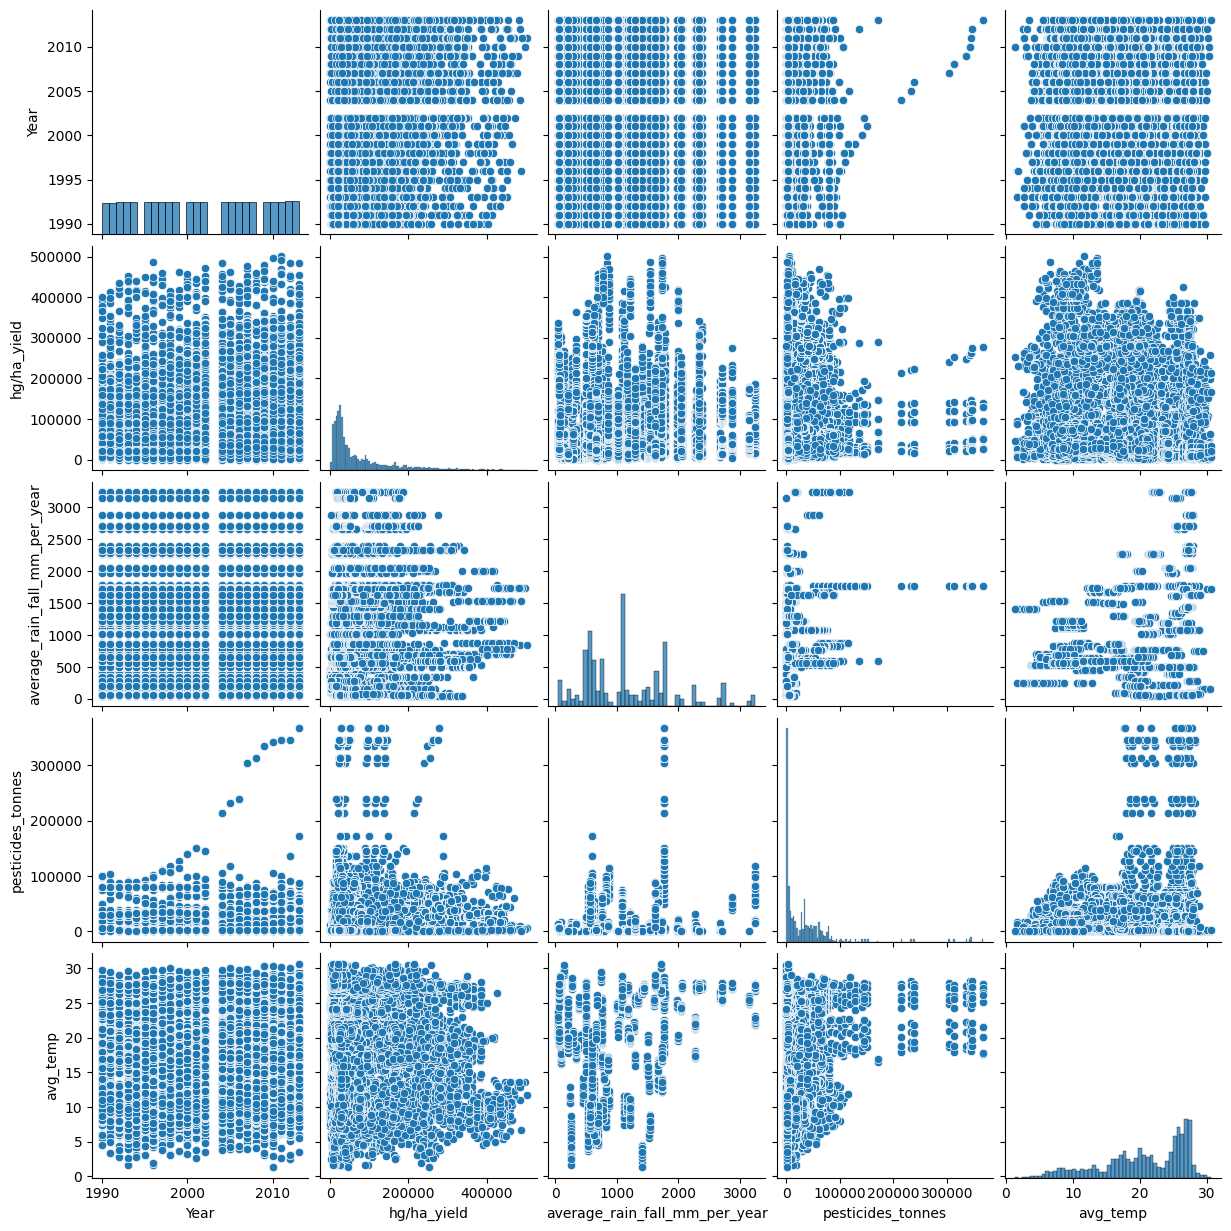

In [29]:
sns.pairplot(working_yield)

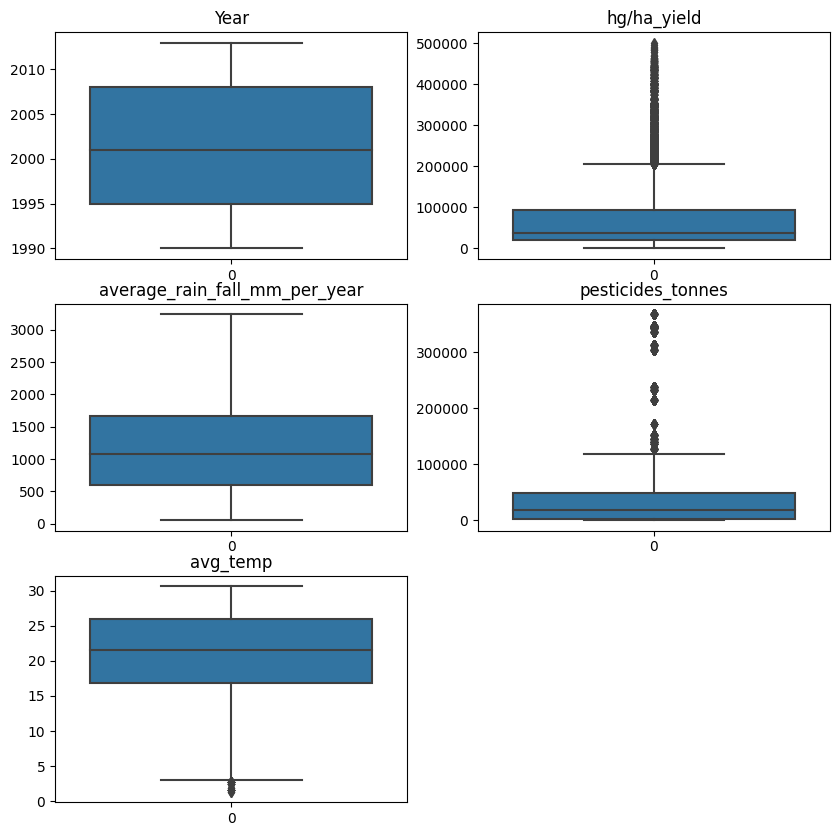

In [30]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= working_yield['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= working_yield['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= working_yield['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= working_yield['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= working_yield['avg_temp'])
plt.title('avg_temp')

plt.show()

In [31]:
working_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31630 entries, 0 to 31629
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           31630 non-null  object 
 1   Item                           31630 non-null  object 
 2   Year                           31630 non-null  int64  
 3   hg/ha_yield                    31630 non-null  int64  
 4   average_rain_fall_mm_per_year  31630 non-null  float64
 5   pesticides_tonnes              31630 non-null  float64
 6   avg_temp                       31630 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [32]:
### Paddy and Rice are the same crop and hence renaming them
##Plantains and others may be any number of distinct crops in over 100 countries so dropping them because they may not anything valuable

working_yield['Item'] = working_yield['Item'].str.replace('paddy','Rice')
working_yield = working_yield[working_yield['Item'] != 'Plantains and others']
working_yield['Item'].value_counts()

Item
Rice              6776
Potatoes          4276
Maize             4121
Wheat             3857
Soybeans          3223
Sorghum           3039
Sweet potatoes    2890
Cassava           2045
Yams               847
Name: count, dtype: int64

Text(0.5, 1.0, 'Heatmap')

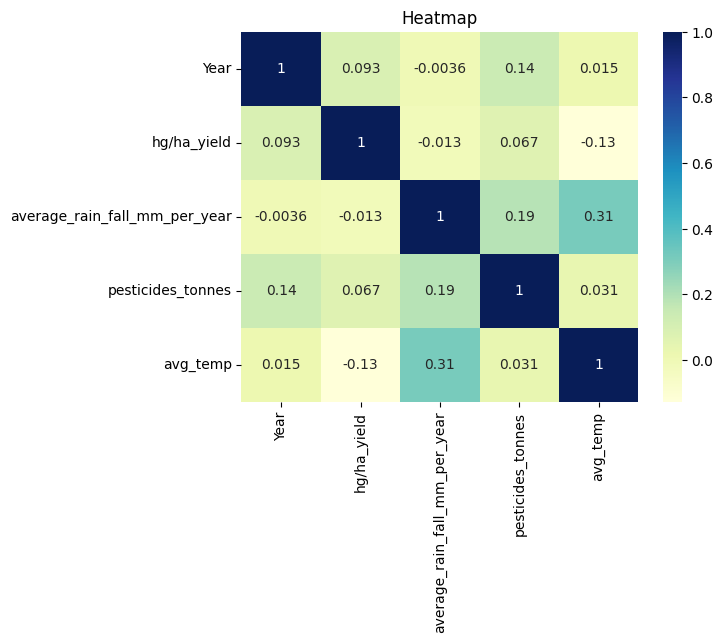

In [33]:
num_cor = working_yield.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

<Axes: xlabel='Year', ylabel='Count'>

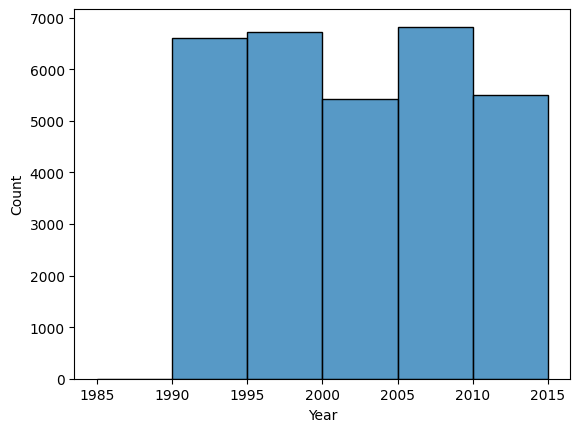

In [34]:
sns.histplot(working_yield, x = 'Year' , bins = range(1985, 2020, 5))


<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

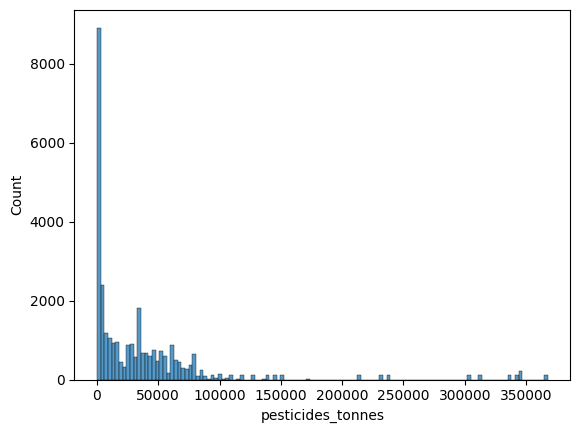

In [35]:
### Checking the pesticide usage data

## Checking the data distribution in the yield column
sns.histplot(working_yield, x = 'pesticides_tonnes' )


In [36]:
working_yield = working_yield[working_yield['pesticides_tonnes'] <= working_yield['pesticides_tonnes'].quantile(0.90)]

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

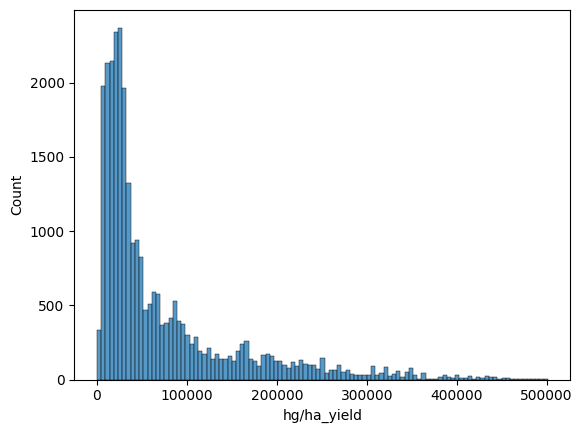

In [37]:
## Checking the data distribution in the yield column(if there have been any changes in the distribution after keeping only 90th quantile of yield)
sns.histplot(working_yield, x = 'hg/ha_yield' )

In [38]:
### There doesnt seem to be much change and hence dropping the upper 5th quantile

working_yield = working_yield[working_yield['hg/ha_yield'] <= working_yield['hg/ha_yield'].quantile(0.95)]

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

Text(0.5, 1.0, 'Heatmap')

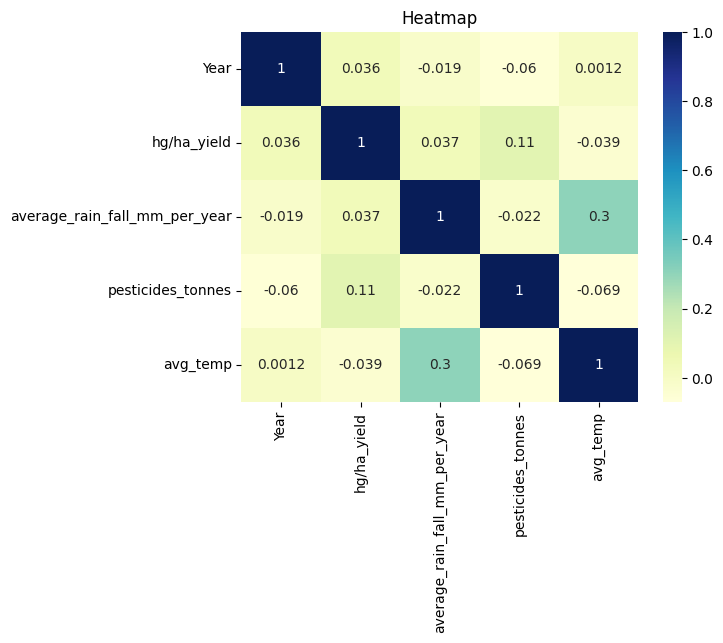

In [40]:
num_cor = working_yield.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

In [41]:
working_yield

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Maize,1991,29068,1485.0,121.00,15.36
2,Albania,Maize,1992,24876,1485.0,121.00,16.06
3,Albania,Maize,1993,24185,1485.0,121.00,16.05
4,Albania,Maize,1994,25848,1485.0,201.00,16.96
...,...,...,...,...,...,...,...
31625,Zimbabwe,Wheat,2009,30000,657.0,3269.99,20.52
31626,Zimbabwe,Wheat,2010,27681,657.0,3305.17,21.17
31627,Zimbabwe,Wheat,2011,26274,657.0,3340.35,20.78
31628,Zimbabwe,Wheat,2012,24420,657.0,3375.53,20.52


In [42]:
working_yield = pd.get_dummies(working_yield,columns = ['Item','Area'], drop_first = 1)

In [43]:
working_yield

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soybeans,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,1990,36613,1485.0,121.00,16.37,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1991,29068,1485.0,121.00,15.36,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1992,24876,1485.0,121.00,16.06,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1993,24185,1485.0,121.00,16.05,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1994,25848,1485.0,201.00,16.96,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31625,2009,30000,657.0,3269.99,20.52,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31626,2010,27681,657.0,3305.17,21.17,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31627,2011,26274,657.0,3340.35,20.78,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31628,2012,24420,657.0,3375.53,20.52,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
scaled_yield=working_yield.copy()

In [45]:
for i in scaled_yield.columns[5:]:
    scaled_yield[i]=scaled_yield[i].map({True:1, False: 0})

In [46]:
scaled_yield

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soybeans,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,1990,36613,1485.0,121.00,16.37,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1991,29068,1485.0,121.00,15.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1992,24876,1485.0,121.00,16.06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1993,24185,1485.0,121.00,16.05,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1994,25848,1485.0,201.00,16.96,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31625,2009,30000,657.0,3269.99,20.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31626,2010,27681,657.0,3305.17,21.17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31627,2011,26274,657.0,3340.35,20.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31628,2012,24420,657.0,3375.53,20.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
Y=scaled_yield['hg/ha_yield']
X= scaled_yield.drop('hg/ha_yield', axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on your training data
scaler.fit(X_train)  # X_train is your training data

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)  # X_test is your testing data


In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
LR_R2 = r2_score(y_test, y_pred)

# Print the model coefficients and evaluation metrics
print("R-squared:", LR_R2)

R-squared: 0.7727251141711667


In [51]:
Model_perf = pd.DataFrame(columns=['Model_Name','R2_Score'])
LR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Linear Regression', 'R2_Score': LR_R2}
Model_perf = pd.concat([Model_perf, pd.DataFrame([new_row])],ignore_index = True)


In [61]:
### Trying the XGB regressor now

from xgboost import XGBRegressor
XG_boost = XGBRegressor(max_depth = 3,n_estimators = 300 )

XG_boost.fit(X_train , y_train)
y_pred = XG_boost.predict(X_test)
XG_R2 = r2_score(y_test,y_pred)
print(XG_R2)
new_row = {'Model_Name':'XGB','R2_Score': XG_R2}
Model_perf = pd.concat([Model_perf,pd.DataFrame([new_row])],ignore_index = True)

0.9281270491660216


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


# Create polynomial features
poly_features = PolynomialFeatures(degree=2)  
X_poly = poly_features.fit_transform(X_train)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# Predict using the trained model

X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)
PR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Polynomial Regression(degree 2)','R2_Score': PR_R2}
Model_perf = pd.concat([Model_perf, pd.DataFrame([new_row])],ignore_index = True)

### Model Performance

In [54]:
Model_perf

,Model_Name,R2_Score
0,Linear Regression,0.772725
1,XGB,0.928127
2,Polynomial Regression(degree 2),0.955227


In [ ]:
XG_rmse = mean_squared_error(y_test,y_pred, squared=False)
XG_rmse

In [57]:
y_test

24422     34154
24046    159467
22606    218597
10992     39542
18378     63279
          ...  
13420     26972
2650      21627
6202      50000
29662     12721
30012     52321
Name: hg/ha_yield, Length: 5400, dtype: int64